In [1]:
%cd ..

/home/caleb/Documents/GitHub/PayneLab/ProteinComplexes


In [2]:
%run Analysis_Functions.ipynb

In [3]:
%run Plotting_Functions.ipynb

## The Proteasome

There is evidence that aberrations in the proteasome are involved in ovarian cancer. For example, increased ubiquitination/degradation of MKP3 (DUSP6), which leads to constitutive activation of the ERK pathway (cell proliferation, growth, survival). Proteasomal degradation of cyclins could also play a role; overexpression of cyclin G2 inhibits ovarian cancer cell proliferation, so increased degradation of cyclin G2 leads to proliferation (PMID: 23300358). 

It has also been found that low-grade and high-grade ovarian carcinoma tissues have elevated 19S and 20S proteasome subunits. Ovarian carcinoma cell lines are sensitive to apoptosis in response to proteasome inhibitors (PMID: 16585202).

One study showed that circulating 20S proteasome concentration is higher in untreated ovarian cancer patients (PMID: 21075439).

### Proteasomal Proteins
Perform t-tests on tumor vs normal protein expression for the proteins within the proteasomal complexes

In [4]:
%%capture --no-stdout --no-display
# The line above will capture stderr and prevent warnings from cluttering our data

proteasome_proteins = subunitNames['PA700 complex'] + subunitNames['26S proteasome'] + subunitNames['20S proteasome'] + subunitNames['PA28-20S proteasome'] + subunitNames['PA700-20S-PA28 complex'] + subunitNames['PA28gamma-20S proteasome']
sig_results = []
# Remove duplicates
proteasome_proteins = list(set(proteasome_proteins))
# Bonferroni correction of the p-value
alpha = 0.05 / len(proteasome_proteins)
# Perform t-tests
for protein in proteasome_proteins:
    pval = ttest_proteomics(protein)
    if pval < alpha:
        sig_results.append(protein)
        print('p-value for ' + protein + ' (tumor vs normal): ' + str(pval))

p-value for PSMA7 (tumor vs normal): 1.8227899836143249e-07
p-value for PSMD1 (tumor vs normal): 4.6623825342606084e-07
p-value for PSMD3 (tumor vs normal): 0.000586684427372541
p-value for PSMD12 (tumor vs normal): 7.548151778740328e-07
p-value for PSMA4 (tumor vs normal): 1.7460358931828652e-08
p-value for PSME3 (tumor vs normal): 2.613435764112579e-10
p-value for PSMC3 (tumor vs normal): 1.2412346600438369e-05
p-value for PSMA6 (tumor vs normal): 1.0369080711600911e-05
p-value for PSMA5 (tumor vs normal): 6.691474546958026e-07
p-value for PSME1 (tumor vs normal): 5.0653245589201115e-06
p-value for PSMA1 (tumor vs normal): 0.0004920383808402439
p-value for PSMD7 (tumor vs normal): 0.0013494242258505708
p-value for PSMD14 (tumor vs normal): 0.00041962693103333716
p-value for PSMB7 (tumor vs normal): 2.692630354822871e-05
p-value for PSMC2 (tumor vs normal): 3.590611409288267e-05
p-value for PSMD8 (tumor vs normal): 2.66866079768471e-07
p-value for PSMB3 (tumor vs normal): 0.0009710486

#### Divide significant results into subunits of the proteasome

In [5]:
sub_20s = []
sub_19s = []
pa28 = []
for protein in sig_results:
    if 'PSMA' in protein or 'PSMB' in protein: sub_20s.append(protein)
    elif 'PSMC' in protein or 'PSMD' in protein: sub_19s.append(protein)
    else: pa28.append(protein)    
        
sub_20s.sort()
sub_19s.sort()
pa28.sort()

### 20S Proteasome

PSMA1: 0.0004920383808402439
PSMA4: 1.7460358931828652e-08
PSMA5: 6.691474546958026e-07
PSMA6: 1.0369080711600911e-05
PSMA7: 1.8227899836143249e-07
PSMB3: 0.0009710486618569306
PSMB7: 2.692630354822871e-05


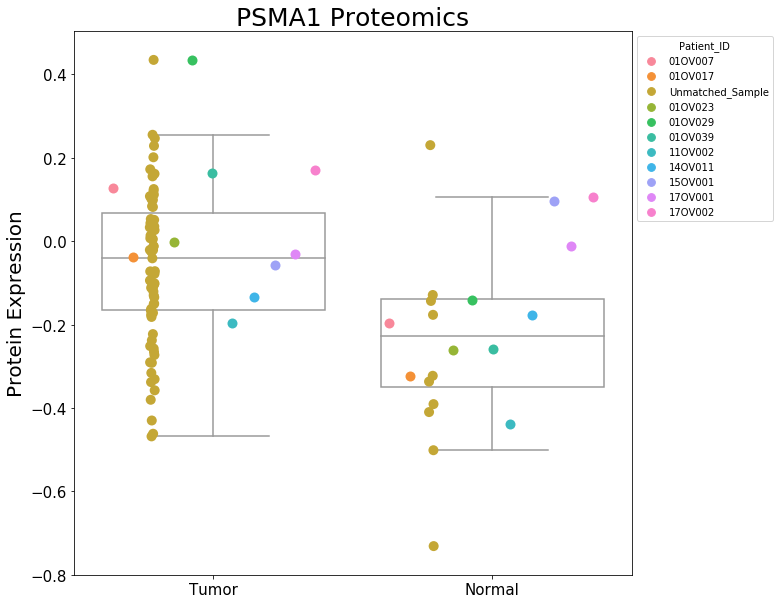

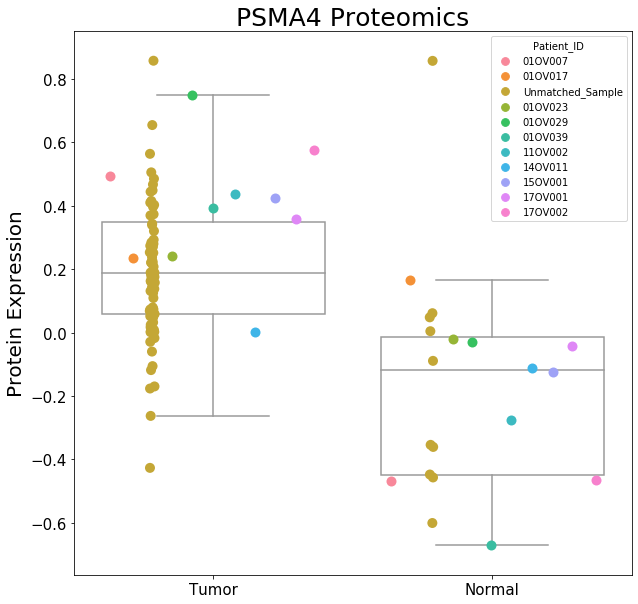

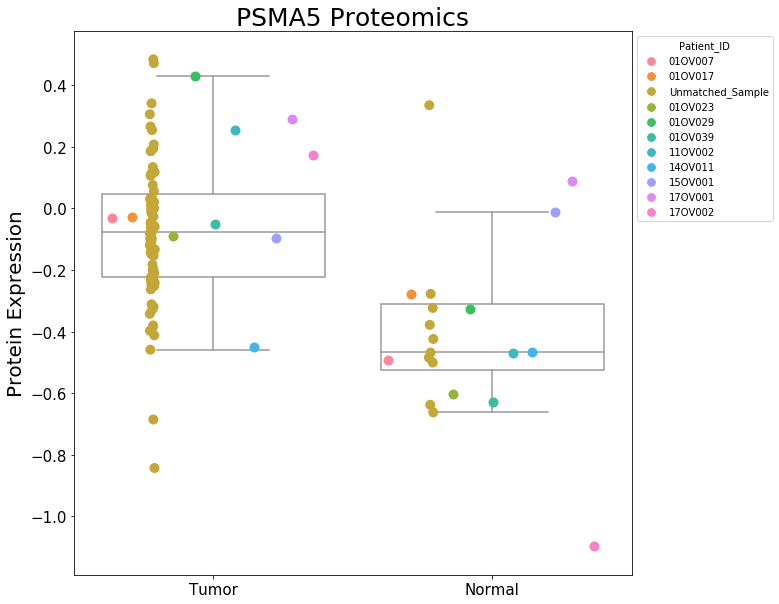

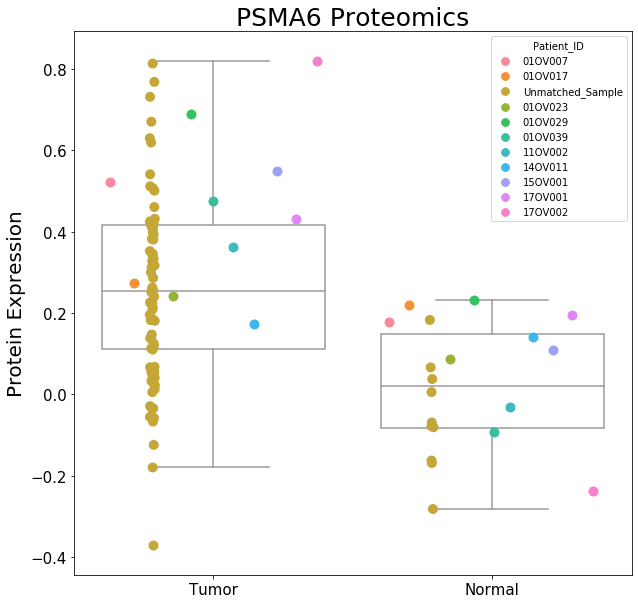

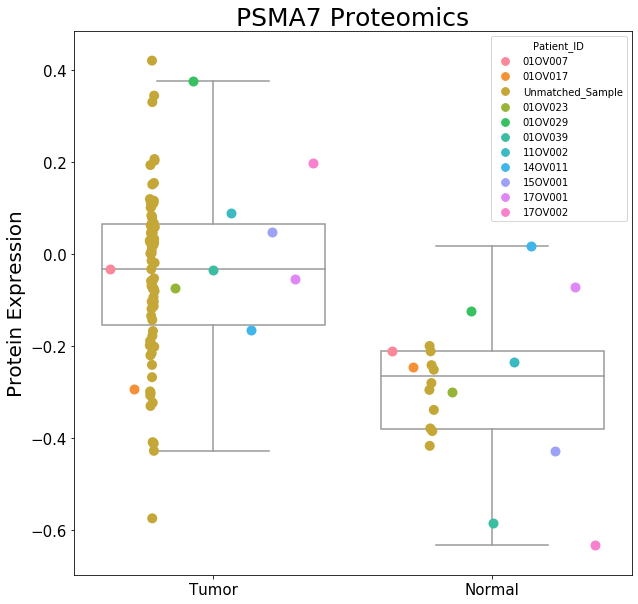

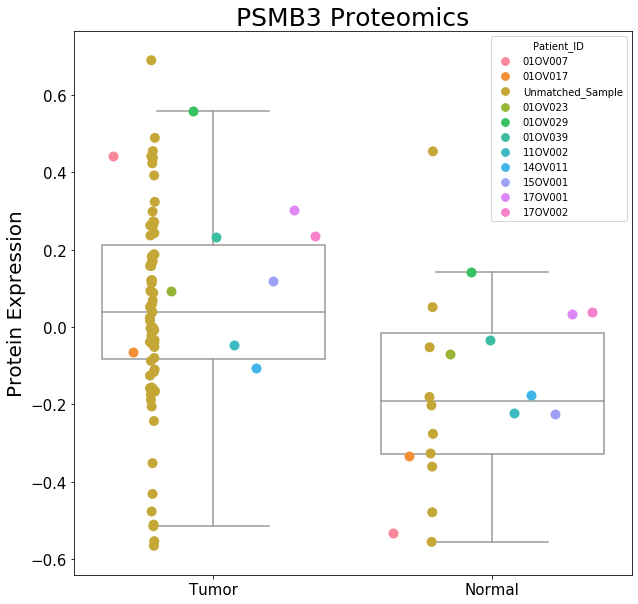

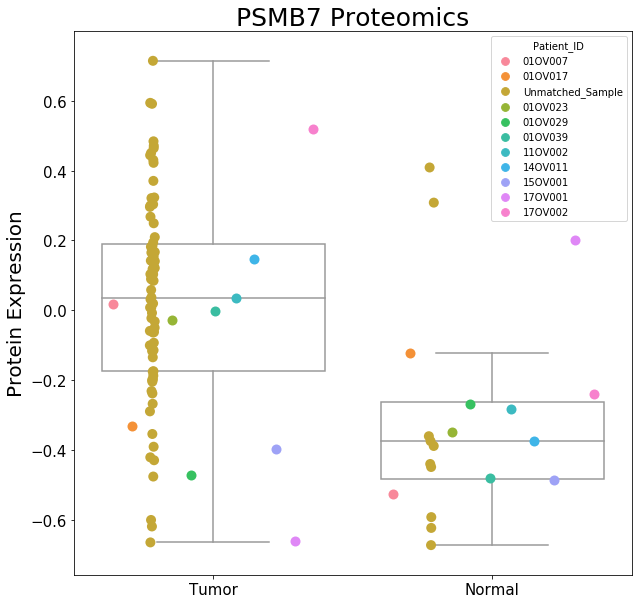

In [6]:
%%capture --no-stdout --no-display
# The line above will capture stderr and prevent warnings from cluttering our data

for protein in sub_20s:
    pval = ttest_proteomics(protein)
    print(protein + ': ' + str(pval))
    plot_proteomics(protein, by_patient = True, print_pvals = False)

### 19S Regulatory Subunit (PA700)

PSMC1: 0.0013276587234482527
PSMC2: 3.590611409288267e-05
PSMC3: 1.2412346600438369e-05
PSMD1: 4.6623825342606084e-07
PSMD12: 7.548151778740328e-07
PSMD14: 0.00041962693103333716
PSMD3: 0.000586684427372541
PSMD7: 0.0013494242258505708
PSMD8: 2.66866079768471e-07


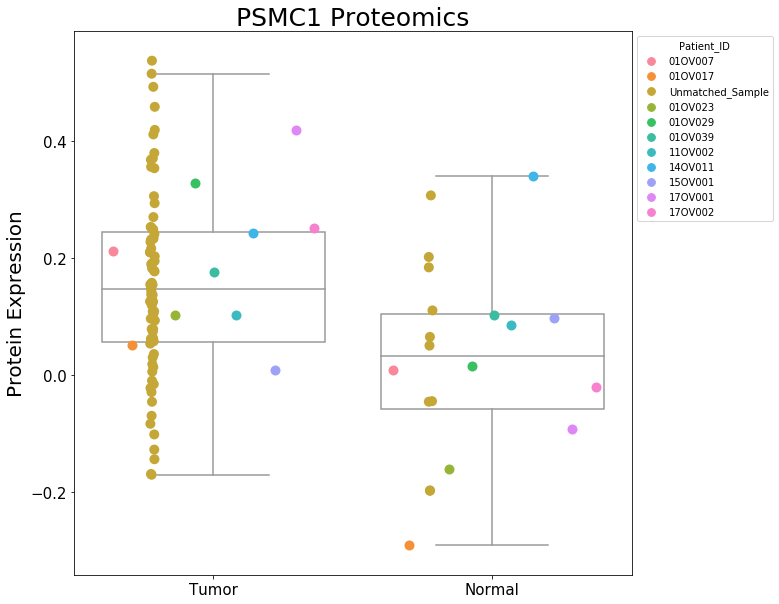

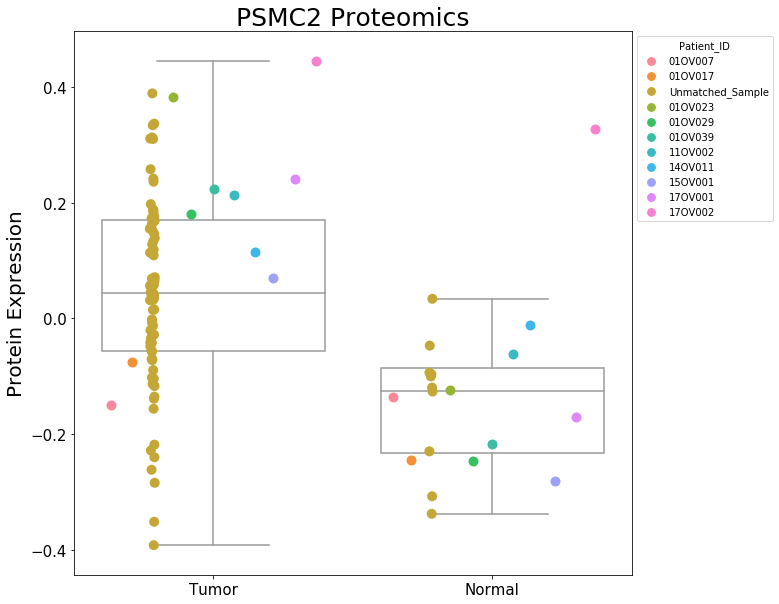

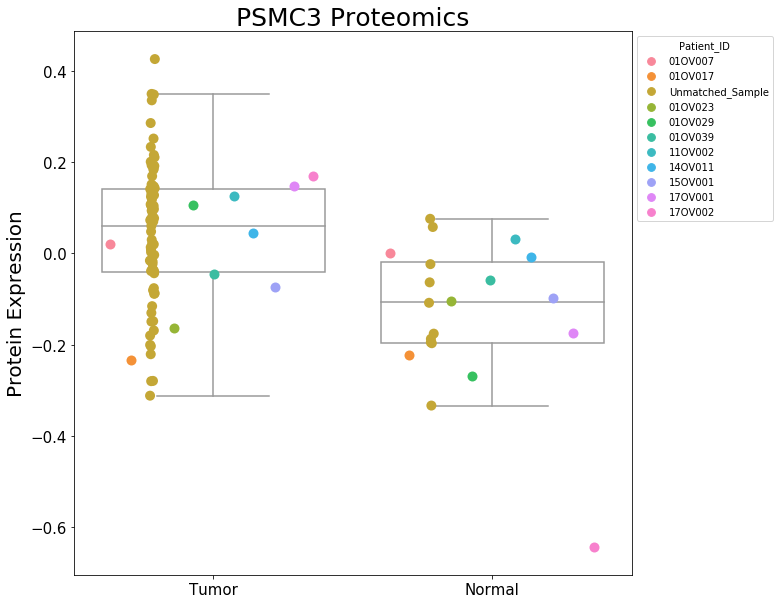

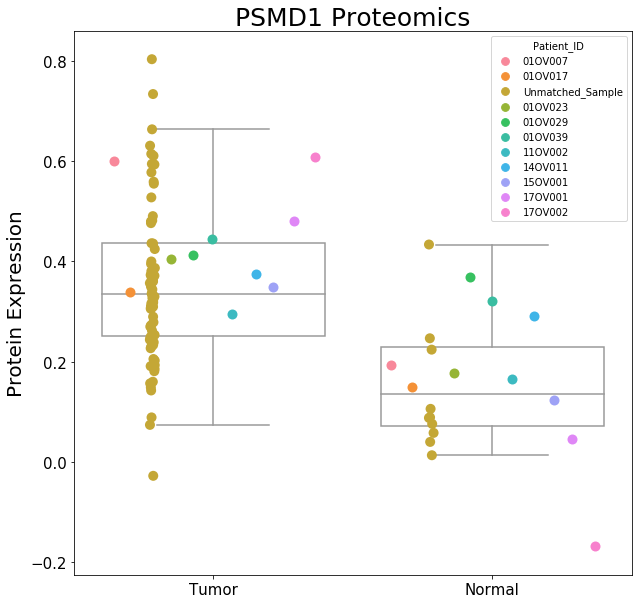

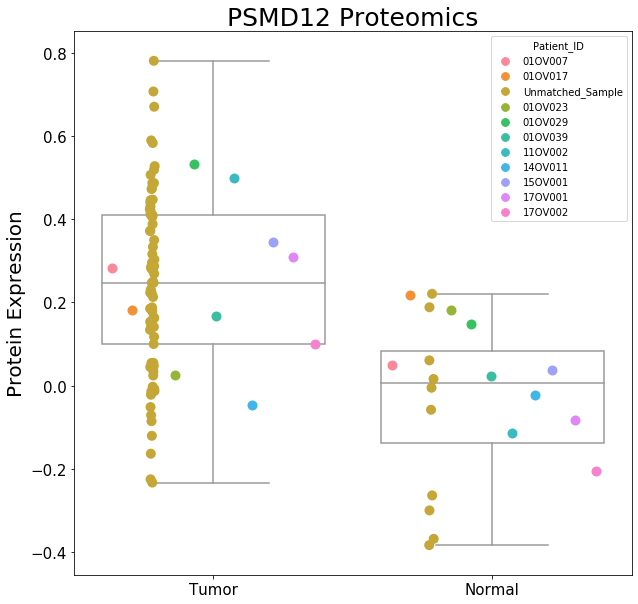

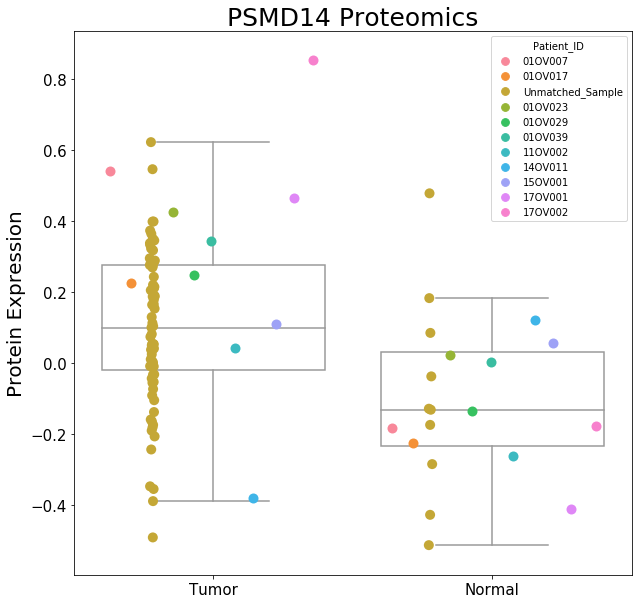

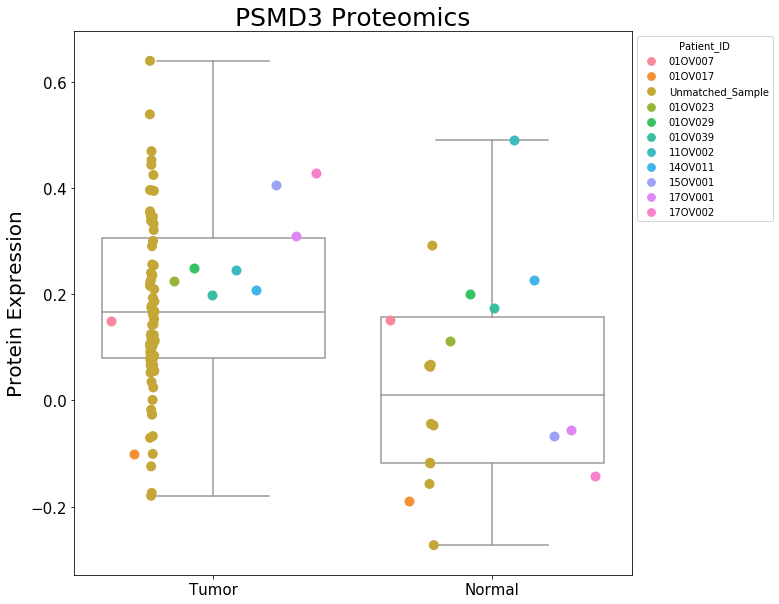

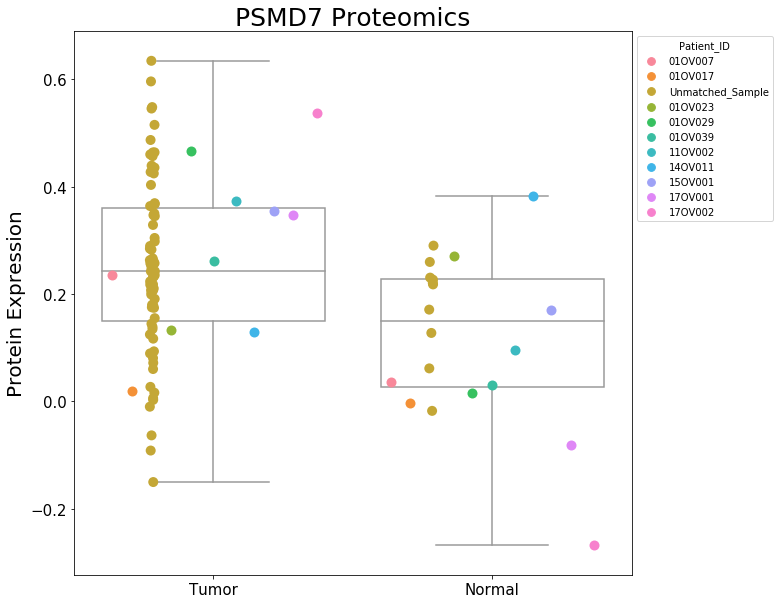

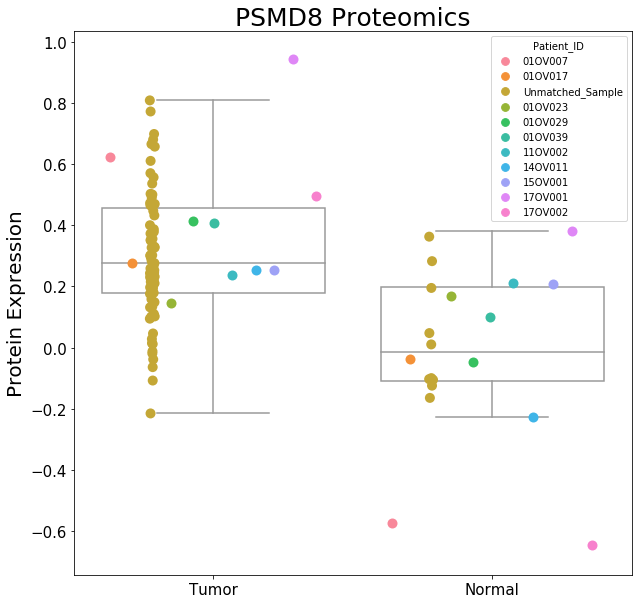

In [7]:
%%capture --no-stdout --no-display
# The line above will capture stderr and prevent warnings from cluttering our data

for protein in sub_19s:
    pval = ttest_proteomics(protein)
    print(protein + ': ' + str(pval))
    plot_proteomics(protein, by_patient = True, print_pvals = False)

### PA28 (11S REG subunit)

PSME1: 5.0653245589201115e-06
PSME2: 1.6032183598140666e-06
PSME3: 2.613435764112579e-10


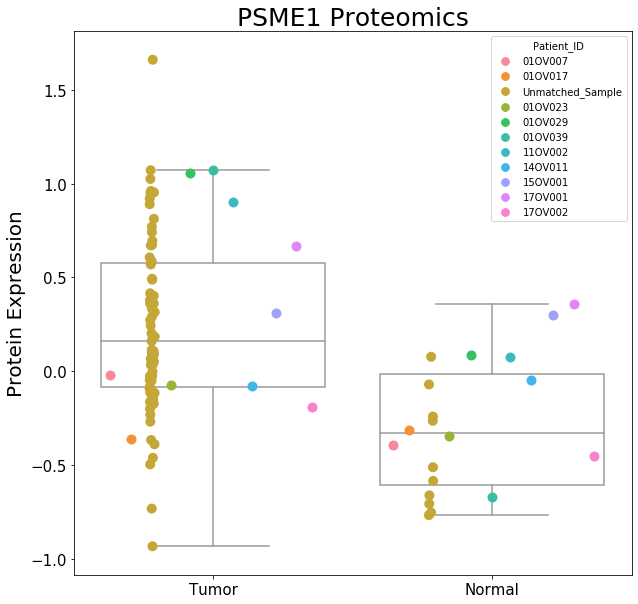

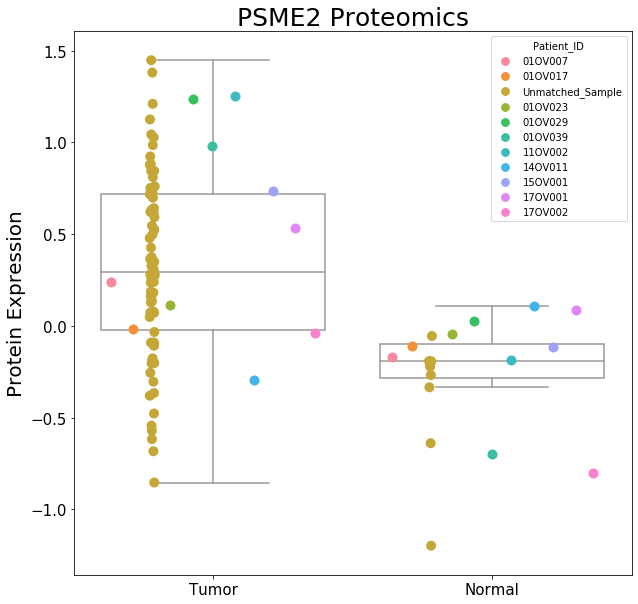

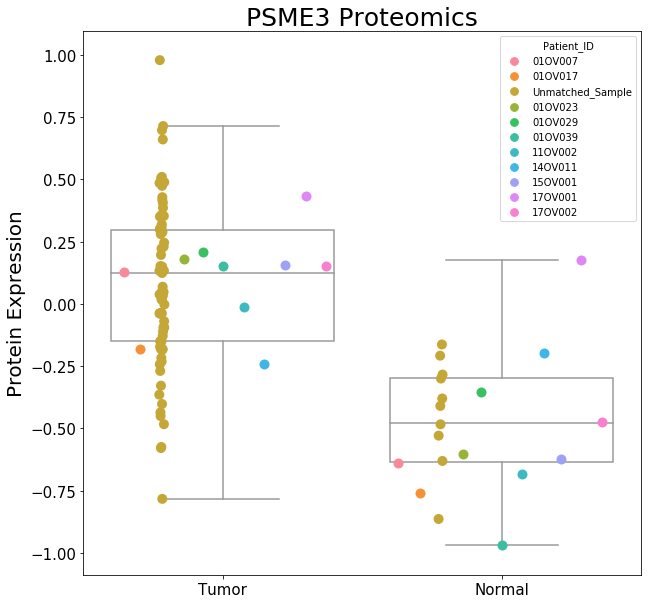

In [8]:
%%capture --no-stdout --no-display
# The line above will capture stderr and prevent warnings from cluttering our data

for protein in pa28:
    pval = ttest_proteomics(protein)
    print(protein + ': ' + str(pval))
    plot_proteomics(protein, by_patient = True, print_pvals = False)

### PA700 Complex
This is the regulatory subcomplex of the 26S proteasome, which interacts with proteins marked for degradation via polyubiquitin chains. It mediates the unfolding and/or translocation of proteins into the proteasome (PMID: 10681537). Elevated proteasome activity and levels of various subunits has frequently been detected in tumor cells (PMID: 27966459).

The PSMD proteins are the non-ATPase subunits of the 19S regulator lid of the proteasome.

In our data, the ratio of PSMD12 to both PSMC6 and PSMD2 is elevated in most tumor samples. The ratio of PSMC3 to PSMC6 is also elevated.

T-test p-value: 4.0700194370717815e-13
Levene p-value: 0.0002052976972771812


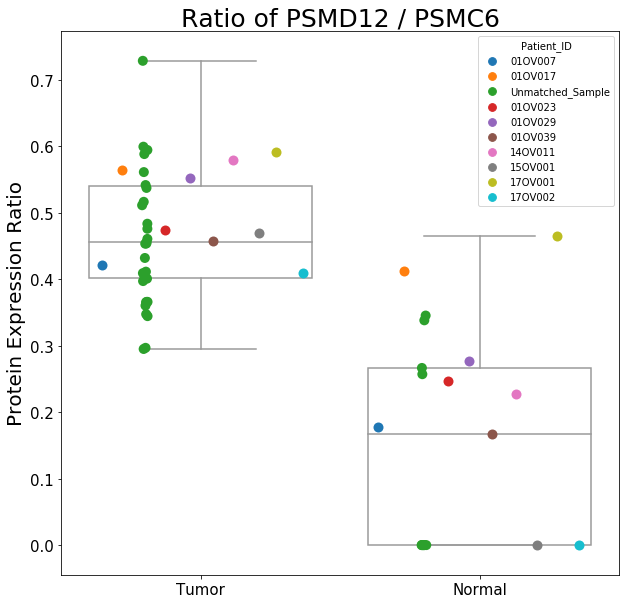

In [9]:
plot_ratios('PSMD12', 'PSMC6', by_patient = True)

T-test p-value: 1.7554832411980443e-09
Levene p-value: 1.9583553908677584e-05


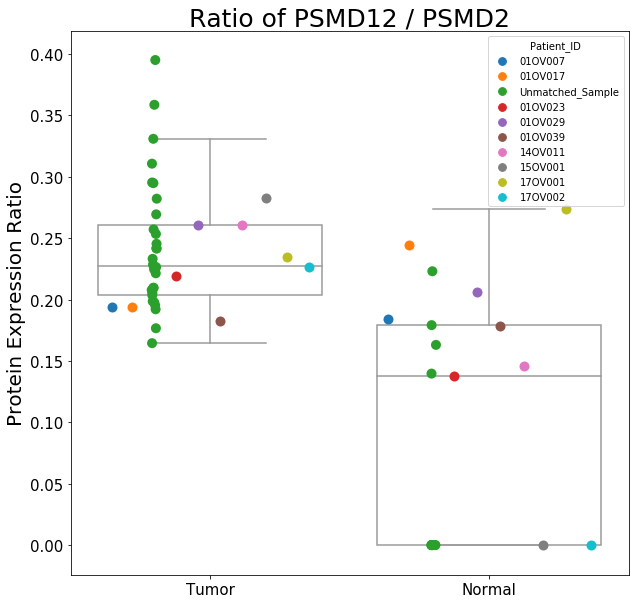

In [10]:
plot_ratios('PSMD12', 'PSMD2', by_patient = True)

T-test p-value: 3.830136602362548e-09
Levene p-value: 0.5702137870562223


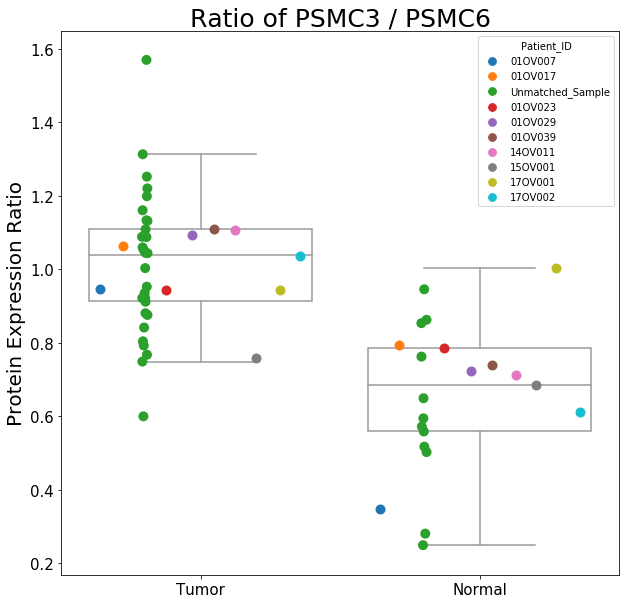

In [11]:
plot_ratios('PSMC3', 'PSMC6', by_patient = True)

Normal samples also show a larger variance in the ratio of PSMD4 to PSMC3

T-test p-value: 0.0026649626769797595
Levene p-value: 1.436022584493798e-09


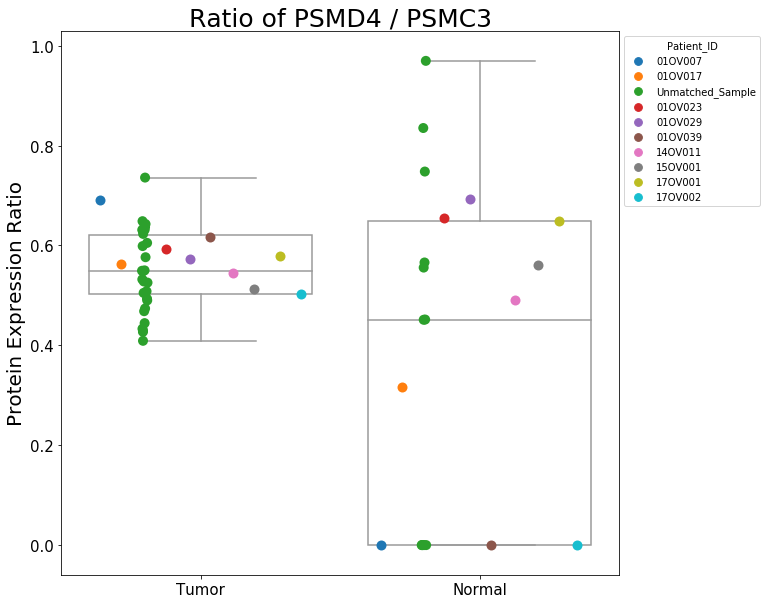

In [12]:
plot_ratios('PSMD4', 'PSMC3', by_patient = True)